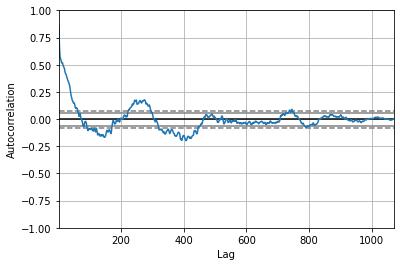

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

dd=500
#####
# real a file that you want to do the time series prediction this file has two columns X and Y
file = 'fort.6431'
f=open(file,"r")
lines=f.readlines()
X1=[]
Y1=[]
Z1=[]

for x in lines:
    X1.append(float(x.split()[0]))
    Y1.append(float(x.split()[1]))
uu=np.zeros((len(Y1)-dd,1))
uu[:,0]=Y1[dd:]

#plt.subplot(1, 2, 2) # row 1, col 2 index 1
#plt.plot(uu)
#plt.subplot(1, 2, 2) # row 1, col 2 index 1
autocorrelation_plot(uu)
#####

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


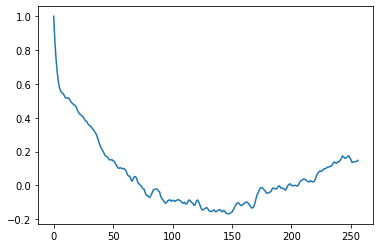

In [ ]:
#Compute the function 
from statsmodels.tsa.stattools import acf
from matplotlib import pyplot as plt

lag_acf = acf(uu, nlags=256, fft=True)
plt.plot(lag_acf)
#plt.title('Autocorrelation Function')

window =  250
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 250, 100)          40800     
_________________________________________________________________
dropout (Dropout)            (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 250, 100)          80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 250, 100)          80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250, 100)          0         
_________________________________________________________________
dense (Dense)                (None, 250, 1

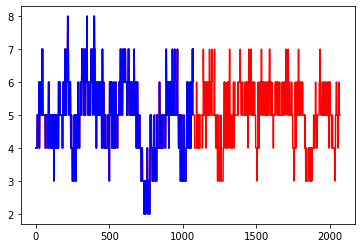

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import random

import csv
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew

EPO=900
window=250
Sk=[]
Kt=[]
Me=[]
St=[]
for io in range (1):
  #window =window +50
  window = 250
  
  print('window = ',window)
  #####
  #file = 'fort.5061'
  f=open(file,"r")
  lines=f.readlines()
  X1=[]
  Y1=[]
  Z1=[]
  
  for x in lines:
      X1.append(float(x.split()[0]))
      Y1.append(float(x.split()[1]))
  apple_training_processed=np.zeros((len(Y1)-dd,1))
  apple_training_processed[:,0]=Y1[dd:]

  #####
  ###########################apple_training_complete = pd.read_csv(r'/content/Q6.csv')
  ###########################apple_training_processed = apple_training_complete.iloc[:, 1:2].values
  ##print('hhhh',apple_training_processed)
  ##print('JJO',np.shape(apple_training_processed))
  scaler = MinMaxScaler(feature_range = (0, 1))
  ##print('kkkkk',apple_training_processed)
  #scaling traing
  apple_training_scaled = scaler.fit_transform(apple_training_processed)

  features_set = []
  labels = []
  for i in range(0, len(apple_training_scaled)-1-2*window):
      features_set.append(apple_training_scaled[i:i+window, 0])
      labels.append(apple_training_scaled[i+window:i+2*window, 0])

  #Array Foramt 
  features_set, labels = np.array(features_set), np.array(labels)

  # Reshape to the appropriate format read by LSTM 
  features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
  labels = np.reshape(labels, (labels.shape[0], labels.shape[1], 1))


  model = Sequential()

  model.add(LSTM(units=100, return_sequences=True, input_shape=(features_set.shape[1], 1)))
  model.add(Dropout(0.1))


  model.add(LSTM(units=100, return_sequences=True))
  model.add(Dropout(0.1))

  #model.add(LSTM(units=350, return_sequences=True))
  #model.add(Dropout(0.1))

  model.add(LSTM(units=100, return_sequences=True))
  model.add(Dropout(0.1))


  model.add(Dense(units = 1))
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  model.summary()
  history=model.fit(features_set, labels, epochs = EPO, batch_size = 32)



  from sklearn.preprocessing import MinMaxScaler

  #######
  ####################data_actual = pd.read_csv(r'/content/Q6.csv')
  ####################data_actual = data_actual.iloc[:, 1:2].values
  #file = 'fort.5061'
  f=open(file,"r")
  lines=f.readlines()
  X1=[]
  Y1=[]
  Z1=[]
  
  for x in lines:
      X1.append(float(x.split()[0]))
      Y1.append(float(x.split()[1]))
  data_actual=np.zeros((len(Y1)-dd,1))
  data_actual[:,0]=Y1[dd:]

  #######
  plt.plot(data_actual[:], color='blue', label='Actual Apple Stock Price')

  ########
  ###########data = pd.read_csv(r'/content/Q6.csv')
  ###########data = data.iloc[:, 1:2].values
  #file = 'fort.5061'
  f=open(file,"r")
  lines=f.readlines()
  X1=[]
  Y1=[]
  Z1=[]
  
  for x in lines:
      X1.append(float(x.split()[0]))
      Y1.append(float(x.split()[1]))
  data=np.zeros((len(Y1)-dd,1))
  data[:,0]=Y1[dd:]

  #######
  print('SGH',np.shape(data))
  for iter in range(int(len(data_actual)/window)):
    print('iter',iter)
    scaler = MinMaxScaler(feature_range = (0, 1))

    data_scaled = scaler.fit_transform(data)
    data_set = []
    for i in range(0, len(data)-2*window-1):
        data_set.append(data_scaled[i:i+window, 0])

    data_set = np.array(data_set)
    data_set=np.reshape(data_set,(data_set.shape[0], data_set.shape[1], 1))


    pred_scaled=model.predict(data_set[len(data_set)-1,:,:].reshape(1,window,1))
    #print('jjjj',pred_scaled[0])
    data=np.array(data)
    data=data.tolist()
    for i in range(len(pred_scaled[0])):
      ff=pred_scaled[0,i][0]
      ff=ff.reshape(-1, 1)
      pred = scaler.inverse_transform(ff)
      #Ht
      #data.append([np.round(pred[0,0])+0.01*(-1)**random.randint(0, 1)])
      data.append([np.round(pred[0,0])])
      #Q
      #data.append([pred[0,0]+0.01*(-1)**random.randint(0, 1)])
      #data.append([pred[0,0]])
      

    data=np.array(data)


  plt.plot(data[:] , color='red', label='Predicted Apple Stock Price')
  plt.plot(data_actual[:], color='blue', label='Actual Apple Stock Price')

  #plt.yticks(np.arange(3.5, 4.5, 0.1))
  #plt.xticks(np.arange(0, 3, 0.25))
  '''
    #print('GGG',pred_scaled)
    pred_scaled=pred_scaled.reshape(-1, 1)
    pred = scaler.inverse_transform(pred_scaled)
    #print('FFFF',pred)

    data=np.array(data)
    data=data.tolist()
    #print('1',data)
    #data.append([pred[0,0]+0.04*(-1)**random.randint(0, 1)])
    data.append([np.round(pred[0,0])+0.9*(-1)**random.randint(0, 1)])
    #data.append([pred[0,0]])
    #print('2',data)

    data=np.array(data)
    #print('3',data)

    #if data[len(data)-1]>8.0+0.05*(-1)**random.randint(0, 1):
    #  data[len(data)-1]=7.75+0.05*(-1)**random.randint(0, 1)


  plt.plot(data[:] , color='red', label='Predicted Apple Stock Price')
  plt.plot(data_actual[:], color='blue', label='Actual Apple Stock Price')
  '''

  #STATISTICAL INFO


  Sk.append((window,skew(data[1308:])))
  Kt.append((window,kurtosis(data[1308:])))
  Me.append((window,np.mean(data[1308:])))
  St.append((window,np.std(data[1308:])))
  print('window',window,'skewness=',skew(data),'kurtosis=',kurtosis(data))
  print('window',window,'True skewness=',skew(data_actual),'Truekurtosis=',kurtosis(data_actual))
  print('window',window,'mean data',np.mean(data),'std data',np.std(data))
  print('window',window,'True mean data',np.mean(data_actual),'True std',np.std(data_actual))


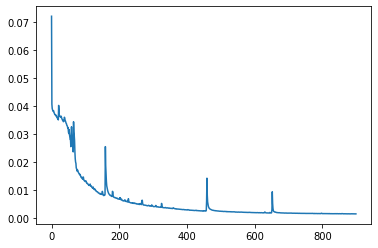

In [ ]:
plt.plot(history.history['loss'])



In [ ]:
#with open('text.csv', 'w') as f:
#  writer = csv.writer(f, delimiter='\t')
#  writer.writerows(zip(xx,yy))

file = open("list.txt", "w")
for index in range(len(xx)):
    file.write(str(xx[index]) + "    " + str(yy[index]) + "\n")
file.close()

SGH (1638, 1)
iter 0
iter 1
iter 2


"\n #print('GGG',pred_scaled)\n pred_scaled=pred_scaled.reshape(-1, 1)\n pred = scaler.inverse_transform(pred_scaled)\n #print('FFFF',pred)\n\n data=np.array(data)\n data=data.tolist()\n #print('1',data)\n #data.append([pred[0,0]+0.04*(-1)**random.randint(0, 1)])\n data.append([np.round(pred[0,0])+0.9*(-1)**random.randint(0, 1)])\n #data.append([pred[0,0]])\n #print('2',data)\n\n data=np.array(data)\n #print('3',data)\n\n #if data[len(data)-1]>8.0+0.05*(-1)**random.randint(0, 1):\n #  data[len(data)-1]=7.75+0.05*(-1)**random.randint(0, 1)\n\n\nplt.plot(data[:] , color='red', label='Predicted Apple Stock Price')\nplt.plot(data_actual[:], color='blue', label='Actual Apple Stock Price')\n"

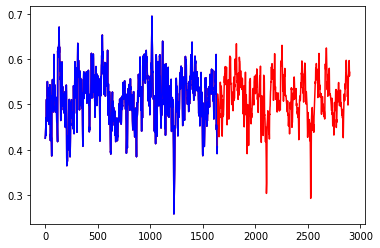

In [ ]:
 from sklearn.preprocessing import MinMaxScaler

data_actual = pd.read_csv(r'/content/Q33.csv')
data_actual = data_actual.iloc[:, 1:2].values
plt.plot(data_actual[:], color='blue', label='Actual Apple Stock Price')

data = pd.read_csv(r'/content/Q33.csv')
data = data.iloc[:, 1:2].values
print('SGH',np.shape(data))
for iter in range(int(len(data_actual)/window)):
  print('iter',iter)
  scaler = MinMaxScaler(feature_range = (0, 1))

  data_scaled = scaler.fit_transform(data)
  data_set = []
  for i in range(0, len(data)-2*window-1):
      data_set.append(data_scaled[i:i+window, 0])

  data_set = np.array(data_set)
  data_set=np.reshape(data_set,(data_set.shape[0], data_set.shape[1], 1))


  pred_scaled=model.predict(data_set[len(data_set)-1,:,:].reshape(1,window,1))
  #print('jjjj',pred_scaled[0])
  data=np.array(data)
  data=data.tolist()
  for i in range(len(pred_scaled[0])):
    ff=pred_scaled[0,i][0]
    ff=ff.reshape(-1, 1)
    pred = scaler.inverse_transform(ff)
    #Ht
    #data.append([np.round(pred[0,0])+0.01*(-1)**random.randint(0, 1)])
  #data.append([np.round(pred[0,0])])
    #Q
    #data.append([pred[0,0]+0.01*(-1)**random.randint(0, 1)])
    data.append([pred[0,0]])
    

  data=np.array(data)


plt.plot(data[:] , color='red', label='Predicted Apple Stock Price')
plt.plot(data_actual[:], color='blue', label='Actual Apple Stock Price')

#plt.yticks(np.arange(3.5, 4.5, 0.1))
#plt.xticks(np.arange(0, 3, 0.25))
'''
  #print('GGG',pred_scaled)
  pred_scaled=pred_scaled.reshape(-1, 1)
  pred = scaler.inverse_transform(pred_scaled)
  #print('FFFF',pred)

  data=np.array(data)
  data=data.tolist()
  #print('1',data)
  #data.append([pred[0,0]+0.04*(-1)**random.randint(0, 1)])
  data.append([np.round(pred[0,0])+0.9*(-1)**random.randint(0, 1)])
  #data.append([pred[0,0]])
  #print('2',data)

  data=np.array(data)
  #print('3',data)

  #if data[len(data)-1]>8.0+0.05*(-1)**random.randint(0, 1):
  #  data[len(data)-1]=7.75+0.05*(-1)**random.randint(0, 1)


plt.plot(data[:] , color='red', label='Predicted Apple Stock Price')
plt.plot(data_actual[:], color='blue', label='Actual Apple Stock Price')
'''

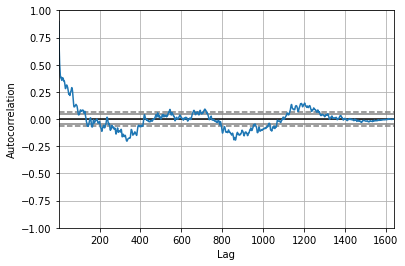

In [ ]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
series = pd.read_csv('Q6.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
hh=autocorrelation_plot(series)
#plot.show()




In [ ]:
import numpy as np
from numpy import random  #it will be useful for generating some random noise (on purpose) in the data points that we want to fit
import matplotlib.pyplot as plt  #for plotting the data
from scipy.stats import skew

#for i in range(len(kur)):
#  kur[:][i]=-(kur[:][i]-kurtosis(data_actual))
#  ske[:][i]=-(ske[:][i]-skew(data_actual)[0])

fit = np.polyfit(window1,kur,2)
yy=fit[0]*(np.power(window1, 2))+fit[1]*(np.power(window1, 1))+fit[2]
print('KUR',fit)
print('XKUR',-fit[1]/(2*fit[0]))
plt.plot(window1,yy,'blue')
plt.scatter(window1,kur)

fit = np.polyfit(window1,ske,2)
yy=fit[0]*(np.power(window1, 2))+fit[1]*(np.power(window1, 1))+fit[2]
print('SKE',fit)
print('XSKE',-fit[1]/(2*fit[0]))
plt.plot(window1,yy,'red')
plt.scatter(window1,ske)
plt.plot(window1,true_kur)
plt.plot(window1,true_ske)


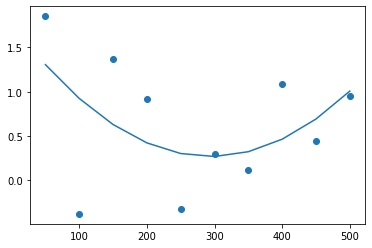

In [ ]:
from pyomo.environ import *

# create a model
model = ConcreteModel()

# declare decision variables
model.x = Var(domain=NonNegativeReals)

# declare objective
model.profit = Objective(expr = fit[0]*(model.x)^2 + fit[1]*(model.x)+fit[2] , sense=maximize)

# declare constraints
model.demand = Constraint(expr = model.x >= 40)
model.laborA = Constraint(expr = model.x + model.y <= 80)
model.laborB = Constraint(expr = 2*model.x + model.y <= 100)

model.pprint()

SGH (1308, 1)
iter 0
iter 1
iter 2
iter 3


"\n  #print('GGG',pred_scaled)\n  pred_scaled=pred_scaled.reshape(-1, 1)\n  pred = scaler.inverse_transform(pred_scaled)\n  #print('FFFF',pred)\n\n  data=np.array(data)\n  data=data.tolist()\n  #print('1',data)\n  #data.append([pred[0,0]+0.04*(-1)**random.randint(0, 1)])\n  data.append([np.round(pred[0,0])+0.9*(-1)**random.randint(0, 1)])\n  #data.append([pred[0,0]])\n  #print('2',data)\n\n  data=np.array(data)\n  #print('3',data)\n\n  #if data[len(data)-1]>8.0+0.05*(-1)**random.randint(0, 1):\n  #  data[len(data)-1]=7.75+0.05*(-1)**random.randint(0, 1)\n\n\nplt.plot(data[:] , color='red', label='Predicted Apple Stock Price')\nplt.plot(data_actual[:], color='blue', label='Actual Apple Stock Price')\n"

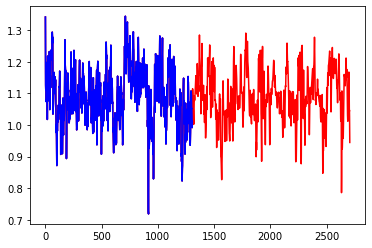

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data_actual = pd.read_csv(r'/content/G9Q40.csv')
data_actual = data_actual.iloc[:, 1:2].values
plt.plot(data_actual[:], color='blue', label='Actual Apple Stock Price')

data = pd.read_csv(r'/content/G9Q40.csv')
data = data.iloc[:, 1:2].values
print('SGH',np.shape(data))
for iter in range(4):
  print('iter',iter)
  scaler = MinMaxScaler(feature_range = (0, 1))

  data_scaled = scaler.fit_transform(data)
  data_set = []
  for i in range(0, len(data)-2*window-1):
      data_set.append(data_scaled[i:i+window, 0])

  data_set = np.array(data_set)
  data_set=np.reshape(data_set,(data_set.shape[0], data_set.shape[1], 1))


  pred_scaled=model.predict(data_set[len(data_set)-1,:,:].reshape(1,window,1))
  #print('jjjj',pred_scaled[0])
  data=np.array(data)
  data=data.tolist()
  for i in range(len(pred_scaled[0])):
    ff=pred_scaled[0,i][0]
    ff=ff.reshape(-1, 1)
    pred = scaler.inverse_transform(ff)
    #Ht
    #data.append([np.round(pred[0,0])+0.01*(-1)**random.randint(0, 1)])
  #data.append([np.round(pred[0,0])])
    #Q
    #data.append([pred[0,0]+0.01*(-1)**random.randint(0, 1)])
    data.append([pred[0,0]])
    

  data=np.array(data)


plt.plot(data[:] , color='red', label='Predicted Apple Stock Price')
plt.plot(data_actual[:], color='blue', label='Actual Apple Stock Price')

#plt.yticks(np.arange(3.5, 4.5, 0.1))
#plt.xticks(np.arange(0, 3, 0.25))
'''
  #print('GGG',pred_scaled)
  pred_scaled=pred_scaled.reshape(-1, 1)
  pred = scaler.inverse_transform(pred_scaled)
  #print('FFFF',pred)

  data=np.array(data)
  data=data.tolist()
  #print('1',data)
  #data.append([pred[0,0]+0.04*(-1)**random.randint(0, 1)])
  data.append([np.round(pred[0,0])+0.9*(-1)**random.randint(0, 1)])
  #data.append([pred[0,0]])
  #print('2',data)

  data=np.array(data)
  #print('3',data)

  #if data[len(data)-1]>8.0+0.05*(-1)**random.randint(0, 1):
  #  data[len(data)-1]=7.75+0.05*(-1)**random.randint(0, 1)


plt.plot(data[:] , color='red', label='Predicted Apple Stock Price')
plt.plot(data_actual[:], color='blue', label='Actual Apple Stock Price')
'''

In [ ]:

# name of csv file 
filename = "prediction.csv"
    
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    for ii in range(len(data)):
      csvwriter.writerow(data[ii,:]) 

In [ ]:

from sklearn.preprocessing import MinMaxScaler

data_actual = pd.read_csv(r'/content/Ht23.csv')
data_actual = data_actual.iloc[:, 1:2].values
plt.plot(data_actual[:], color='blue', label='Actual Apple Stock Price')

data = pd.read_csv(r'/content/Ht23.csv')
data = data.iloc[:, 1:2].values

for iter in range(2000):
  print('iter',iter)
  scaler = MinMaxScaler(feature_range = (0, 1))

  data_scaled = scaler.fit_transform(data)
  data_set = []
  for i in range(window, len(data)-1):
      data_set.append(data_scaled[i-window:i, 0])

  data_set = np.array(data_set)
  data_set=np.reshape(data_set,(data_set.shape[0], data_set.shape[1], 1))

  pred_scaled=model.predict(data_set[len(data_set)-1,:,:].reshape(1,window,1))[0,0]
  #print('GGG',pred_scaled)
  pred_scaled=pred_scaled.reshape(-1, 1)
  pred = scaler.inverse_transform(pred_scaled)
  #print('FFFF',pred)

  data=np.array(data)
  data=data.tolist()
  #print('1',data)
  #data.append([pred[0,0]+0.04*(-1)**random.randint(0, 1)])
  data.append([np.round(pred[0,0])+0.5*(-1)**random.randint(0, 1)])
  #data.append([pred[0,0]])
  #print('2',data)

  data=np.array(data)
  #print('3',data)

  #if data[len(data)-1]>8.0+0.05*(-1)**random.randint(0, 1):
  #  data[len(data)-1]=7.75+0.05*(-1)**random.randint(0, 1)


plt.plot(data[:] , color='red', label='Predicted Apple Stock Price')
plt.plot(data_actual[:], color='blue', label='Actual Apple Stock Price')

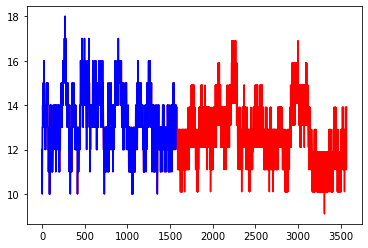

In [ ]:

plt.plot(data[:] , color='red', label='Predicted Apple Stock Price')
plt.plot(data_actual[:], color='blue', label='Actual Apple Stock Price')
